### 8. Ranking

In [12]:
import numpy as np
import pandas as pd

ratings = pd.read_csv('ratings.csv',quotechar='"')
movies = pd.read_csv('movies.csv',quotechar='"')

In [13]:
from surprise import KNNWithMeans, NMF, SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate, KFold, train_test_split
from surprise import accuracy
import matplotlib.pyplot as plt
from collections import defaultdict

In [14]:
def precision_recall(predictions, t, threshold=3):
    '''Return precision and recall at t metrics for each user.'''
    k = t
    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        if len(user_ratings) >= k:
            # Sort user ratings by estimated value
            user_ratings.sort(key=lambda x: x[0], reverse=True)
            # Number of relevant items "G"
            n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
            # Number of recommended items in top k "S"
            n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
            # Number of relevant and recommended items in top k "S and G"
            n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                                  for (est, true_r) in user_ratings[:k])
            if n_rel != 0:
                # Precision@K: Proportion of recommended items that are relevant
                precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1
                # Recall@K: Proportion of relevant items that are recommended
                recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

##### Problem 36

In [15]:
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader=reader)
kf = KFold(n_splits=10,random_state=42)
sim_options = {'name': 'pearson'}
algo = KNNWithMeans(k=16, sim_options=sim_options,random_state=42)

precision_p36 = list()
recall_p36 = list()
ts = range(1,26)

for t in ts:
    precisions = dict()
    recalls = dict()
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        p,r = precision_recall(predictions, t=t, threshold=3)
        precisions.update(p)
        recalls.update(r)
    precision_p36.append(np.mean(list(precisions.values())))
    recall_p36.append(np.mean(list(recalls.values())))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

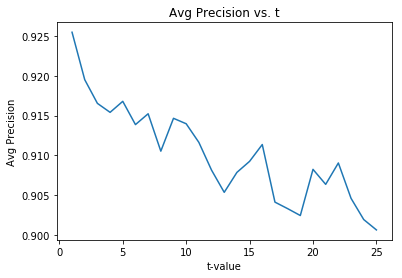

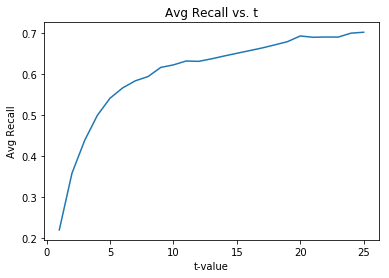

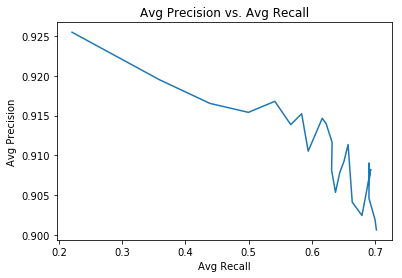

In [16]:
plt.figure()
plt.title("Avg Precision vs. t")
plt.ylabel("Avg Precision")
plt.xlabel("t-value")
plt.plot(ts, precision_p36)
plt.show()

plt.figure()
plt.title("Avg Recall vs. t")
plt.ylabel("Avg Recall")
plt.xlabel("t-value")
plt.plot(ts, recall_p36)
plt.show()

plt.figure()
plt.title("Avg Precision vs. Avg Recall")
plt.ylabel("Avg Precision")
plt.xlabel("Avg Recall")
plt.plot(recall_p36,precision_p36)
plt.show()

##### Problem 37

In [17]:
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader=reader)
kf = KFold(n_splits=10,random_state=42)
algo = NMF(n_factors=16,random_state=42)

precision_p37 = list()
recall_p37 = list()
ts = range(1,26)

for t in ts:
    precisions = dict()
    recalls = dict()
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        p,r = precision_recall(predictions, t=t, threshold=3)
        precisions.update(p)
        recalls.update(r)
    precision_p37.append(np.mean(list(precisions.values())))
    recall_p37.append(np.mean(list(recalls.values())))

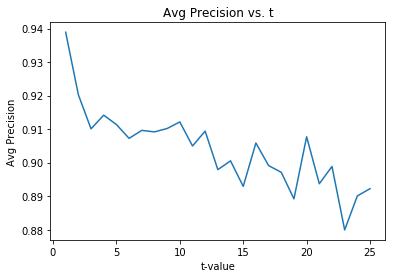

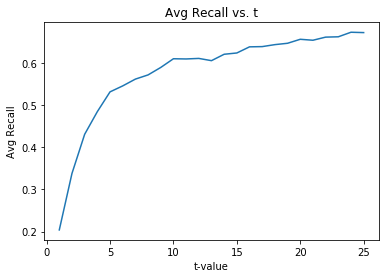

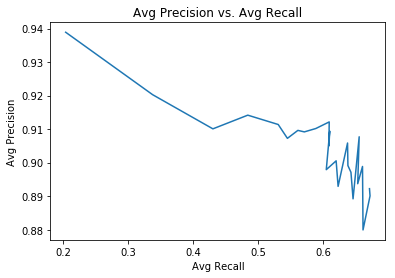

In [7]:
plt.figure()
plt.title("Avg Precision vs. t")
plt.ylabel("Avg Precision")
plt.xlabel("t-value")
plt.plot(ts, precision_p37)
plt.show()

plt.figure()
plt.title("Avg Recall vs. t")
plt.ylabel("Avg Recall")
plt.xlabel("t-value")
plt.plot(ts, recall_p37)
plt.show()

plt.figure()
plt.title("Avg Precision vs. Avg Recall")
plt.ylabel("Avg Precision")
plt.xlabel("Avg Recall")
plt.plot(recall_p37,precision_p37)
plt.show()

##### Problem 38

In [18]:
reader = Reader(rating_scale=(0,5))
data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader=reader)
kf = KFold(n_splits=10,random_state=42)
algo = SVD(n_factors=36,biased=True,random_state=42)

precision_p38 = list()
recall_p38 = list()
ts = range(1,26)

for t in ts:
    precisions = dict()
    recalls = dict()
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        p,r = precision_recall(predictions, t=t, threshold=3)
        precisions.update(p)
        recalls.update(r)
    precision_p38.append(np.mean(list(precisions.values())))
    recall_p38.append(np.mean(list(recalls.values())))

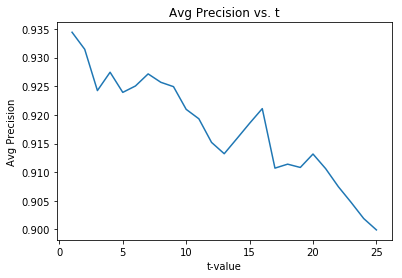

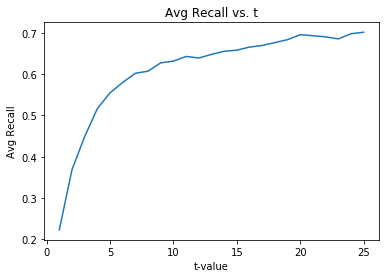

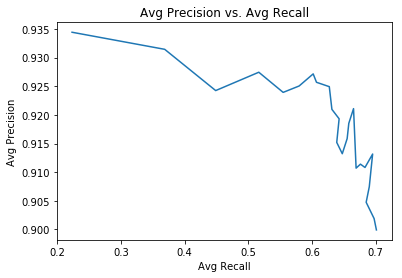

In [20]:
plt.figure()
plt.title("Avg Precision vs. t")
plt.ylabel("Avg Precision")
plt.xlabel("t-value")
plt.plot(ts, precision_p38)
plt.show()

plt.figure()
plt.title("Avg Recall vs. t")
plt.ylabel("Avg Recall")
plt.xlabel("t-value")
plt.plot(ts, recall_p38)
plt.show()

plt.figure()
plt.title("Avg Precision vs. Avg Recall")
plt.ylabel("Avg Precision")
plt.xlabel("Avg Recall")
plt.plot(recall_p38,precision_p38)
plt.show()

###### Problem 39

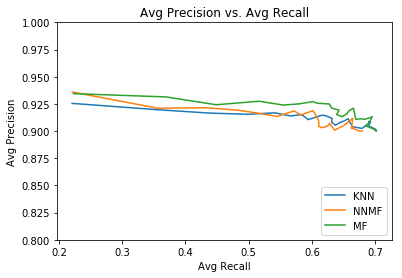

In [21]:
plt.figure()
plt.title("Avg Precision vs. Avg Recall")
plt.ylabel("Avg Precision")
plt.xlabel("Avg Recall")
plt.plot(recall_p36,precision_p36,label="KNN")
plt.plot(recall_p37,precision_p37,label="NNMF")
plt.plot(recall_p38,precision_p38,label="MF")
plt.ylim(0.8,1)
plt.legend(loc="lower right")
plt.show()